In [16]:
import swarms
import pread as pr
import numpy as np
import matplotlib.pyplot as plt
from pread import BaraffeModelFixedTime, BaraffeModelFixedMass

from swarms import LSUN, MSUN, TSUN, PC, AU, MEARTH, REARTH, RJUP, MJUP, JY, YEAR, MICRON

try:
    plt.style.use('paper')
except:
    pass

In [5]:
time = 3.e7 * YEAR # seconds
star = swarms.Star(L=LSUN, M=MSUN, T=TSUN, d=10*PC)
earth = swarms.Planet(star, M=MEARTH, R=REARTH, a=1*AU, Q=0.3)
# R = None gets radius from Baraffe models at the given Z and time
supjup = swarms.Planet(star, M=5*MJUP, R=None, a=1*AU, Q=0.5, Z='002', age=time)     

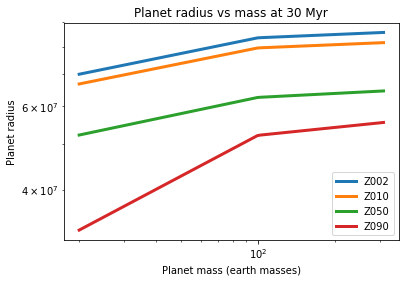

In [7]:
fig, ax = plt.subplots()

M = np.logspace(np.log10(20), np.log10(318), 100, endpoint=False)*MEARTH
Zs = ['002', '010', '050', '090']

for Z in Zs:
    model = BaraffeModelFixedTime(Z, time)
    ax.plot(M/MEARTH, model.R(M), lw=3, label='Z'+Z) 

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Planet mass (earth masses)')
ax.set_ylabel('Planet radius')
ax.set_title('Planet radius vs mass at 30 Myr')
ax.legend()

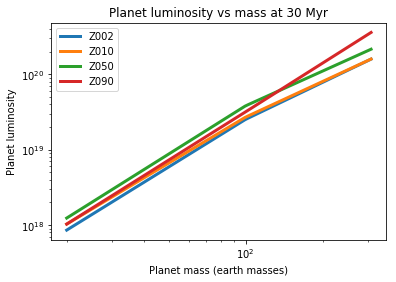

In [8]:
fig, ax = plt.subplots()

M = np.logspace(np.log10(20), np.log10(318), 100, endpoint=False)*MEARTH
Zs = ['002', '010', '050', '090']

for Z in Zs:
    model = BaraffeModelFixedTime(Z, time)
    ax.plot(M/MEARTH, model.L(M), lw=3, label='Z'+Z) 

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Planet mass (earth masses)')
ax.set_ylabel('Planet luminosity')
ax.set_title('Planet luminosity vs mass at 30 Myr')
ax.legend()

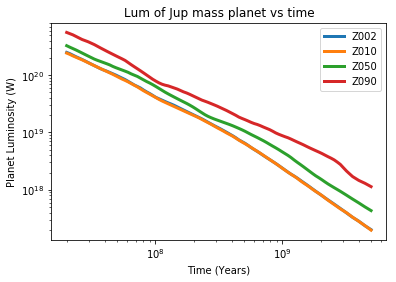

In [10]:
fig, ax = plt.subplots()

mass = 318
t = np.logspace(np.log10(2.e7*YEAR), np.log10(5.e9*YEAR), 100)
Zs = ['002', '010', '050', '090']

for Z in Zs:
    model = BaraffeModelFixedMass(Z, mass)
    ax.plot(t/YEAR, model.L(t), lw=3, label='Z'+Z) 
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time (Years)')
ax.set_ylabel('Planet Luminosity (W)')
ax.set_title('Lum of Jup mass planet vs time')
ax.legend()

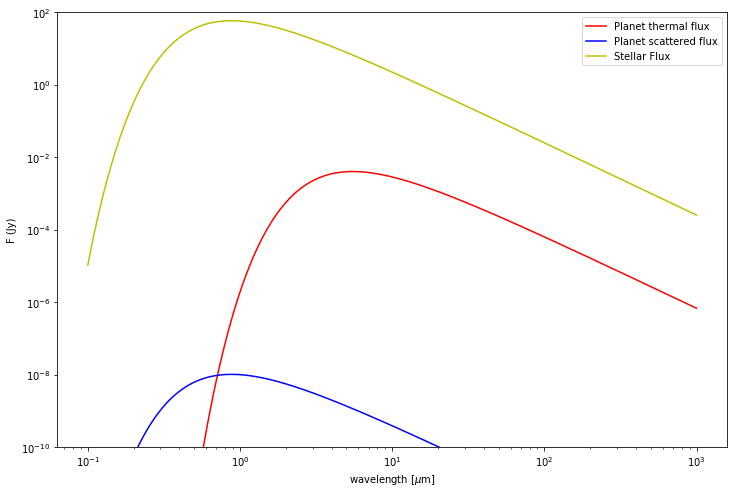

In [18]:
lambdas = np.logspace(-7, -3, 200)
g = 0.32 # assume phase function for Lambert sphere at maximum extension from host star

try:
    plt.style.use('paper')
except:
    pass
fig, ax = plt.subplots(figsize=(12,8))
ax.loglog(lambdas/MICRON, supjup.computeFthermal(lambdas)/JY, 'r', label="Planet thermal flux")
ax.loglog(lambdas/MICRON, earth.computeFscat(lambdas, g)/JY, 'b', label="Planet scattered flux")
ax.loglog(lambdas/MICRON, star.computeFthermal(lambdas, star.d)/JY, 'y', label="Stellar Flux")

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([10e-11, 1e2])
ax.legend()

In [20]:
star = swarms.Star(L=LSUN, M=MSUN, T=TSUN, d=10*PC)
earth = swarms.Planet(star, M=MEARTH, R=REARTH, a=1*AU, Q=0.3)
# R = None gets radius from Baraffe models at the given Z and time
supjup = swarms.Planet(star, M=5*MJUP, R=None, a=1*AU, Q=0.5, Z='002', age=time)     

In [21]:
Q=0.1
eta = 0.4; Nstr = 6.; Dt = 100.; Dmax = 150000.; R_pl = RJUP
lamb = 1.65e-6; g=0.32

In [22]:
planet = swarms.Planet(star, M=20*MEARTH, R=None, a=10*AU, Q=0.5, Z='002', age=1.e8*YEAR)     
swarm = swarms.CollSwarm(star, planet, 1.e-2*MEARTH, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2, age=3.e7*YEAR)

In [25]:
"{0:.3e}".format(swarm.computeCRthermal(1.e-3))

'8.230e-04'